In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
# df = pd.read_csv(io.BytesIO(uploaded['fake_job_postings.csv']))
df = pd.read_csv("fake_job_postings.csv")
print('The data has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The data has 17880 rows and 18 columns


In [ ]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
print("The types of data are:")
print(df.info())

The types of data are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non

In [ ]:
# Handle missing values
df.fillna('', inplace=True)

In [ ]:
#Calculating items in fradulent column
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

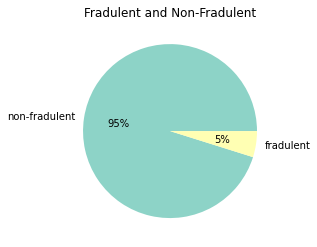

In [ ]:
# print(df['fraudulent'].value_counts(normalize=True) * 100)
data =df['fraudulent'].value_counts(normalize=True) * 100
plt.title("Fradulent and Non-Fradulent")
plt.pie(data,labels=["non-fradulent","fradulent"], colors = sns.color_palette("Set3"), autopct='%.0f%%')
plt.show()

<Axes: xlabel='fraudulent', ylabel='count'>

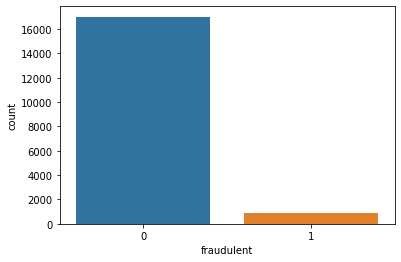

In [ ]:
sns.countplot(x="fraudulent", data=df)

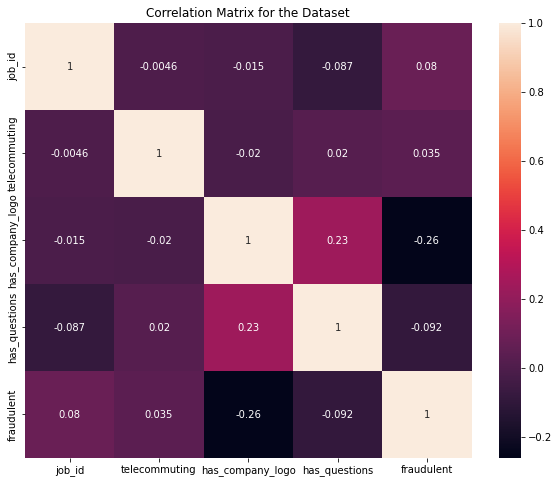

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True)
plt.title("Correlation Matrix for the Dataset")
plt.show()

In [ ]:
column_with_text = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
column_with_text = column_with_text.fillna(' ')
column_with_text.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [ ]:
# Remove unnecessary columns
df = df.drop(['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits'], axis=1)

In [ ]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,,,Marketing,0
1,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,0,1,0,,,,,,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


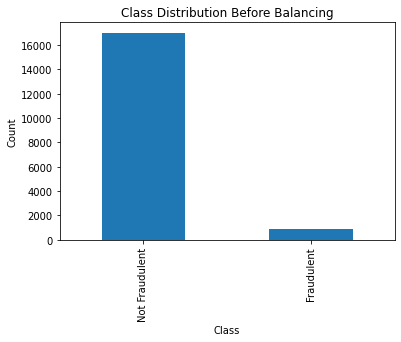

In [ ]:
# Count the number of samples in each class
class_counts = df["fraudulent"].value_counts()

# Create a bar plot of the class counts
class_counts.plot(kind="bar")
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Fraudulent", "Fraudulent"])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        17880 non-null  int64 
 1   has_company_logo     17880 non-null  int64 
 2   has_questions        17880 non-null  int64 
 3   employment_type      17880 non-null  object
 4   required_experience  17880 non-null  object
 5   required_education   17880 non-null  object
 6   industry             17880 non-null  object
 7   function             17880 non-null  object
 8   fraudulent           17880 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
len(df. index)

17880

In [ ]:
len(train_data. index)

14304

In [ ]:
len(test_data. index)

3576

In [ ]:
# Calculate the prior probabilities for each class
prior = {}
total = len(train_data)
for i in range(total):
    label = train_data.iloc[i]['fraudulent']
    if label in prior:
        prior[label] += 1
    else:
        prior[label] = 1
for label in prior:
    prior[label] /= total

In [ ]:
prior

{0: 0.9634368008948546, 1: 0.03656319910514541}

In [ ]:
# Calculate the conditional probabilities for each feature
cond_prob = {}
for col in train_data.columns[:-1]:
#     print(col)
    for label in prior:
        cond_prob[(col, label)] = {}
        for value in set(train_data[col]):
            count = len(train_data[(train_data[col] == value) & (train_data['fraudulent'] == label)])
            cond_prob[(col, label)][value] = (count + 1) / (prior[label] * total + len(set(train_data[col])))

In [ ]:
cond_prob

{('telecommuting', 0): {0: 0.9587898135384169, 1: 0.04121018646158311},
 ('telecommuting', 1): {0: 0.9219047619047619, 1: 0.07809523809523809},
 ('has_company_logo', 0): {0: 0.18051222520496263, 1: 0.8194877747950373},
 ('has_company_logo', 1): {0: 0.5580952380952381, 1: 0.4419047619047619},
 ('has_questions', 0): {0: 0.48842777334397447, 1: 0.5115722266560255},
 ('has_questions', 1): {0: 0.6438095238095238, 1: 0.35619047619047617},
 ('employment_type', 0): {'': 0.19387829114383115,
  'Temporary': 0.014433886994995286,
  'Contract': 0.09320374265612534,
  'Part-time': 0.04446217451222166,
  'Full-time': 0.6417639805613984,
  'Other': 0.012257924131428156},
 ('employment_type', 1): {'': 0.2495274102079395,
  'Temporary': 0.003780718336483932,
  'Contract': 0.05103969754253308,
  'Part-time': 0.04914933837429111,
  'Full-time': 0.6351606805293005,
  'Other': 0.011342155009451797},
 ('required_experience', 0): {'': 0.3842918268184785,
  'Director': 0.02240916672710131,
  'Entry level': 0.

In [ ]:
# Predict the labels for the testing set
predicted = []
for i in range(len(test_data)):
    row = test_data.iloc[i]
    probs = {}
    for label in prior:
        prob = prior[label]
        for col in test_data.columns[:-1]:
            value = row[col]
            if value in cond_prob[(col, label)]:
                prob *= cond_prob[(col, label)][value]
            else:
                prob *= 1 / (prior[label] * total + len(set(train_data[col])))
        probs[label] = prob
    predicted.append(max(probs, key=probs.get))

# Evaluate the performance of the model
actual = test_data['fraudulent'].tolist()
tp = fp = tn = fn = 0
for i in range(len(actual)):
    if actual[i] == predicted[i]:
        if actual[i] == 1:
            tp += 1
        else:
            tn += 1
    else:
        if actual[i] == 1:
            fn += 1
        else:
            fp += 1
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Accuracy: 0.9110738255033557
Precision: 0.6582278481012658
Recall: 0.15160349854227406
F1 Score: 0.24644549763033174


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
col_list=list(df.columns)
for i in col_list:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [ ]:
y=df['fraudulent']
x=df.drop(['fraudulent'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=random_forest.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

Accuracy: 0.977069351230425
Precision: 0.975911884635275
Recall: 0.977069351230425
F1-score: 0.9739063070718713


In [ ]:
# balance the dataset
df_real = df[df["fraudulent"] == 0]
df_fake = df[df["fraudulent"] == 1].sample(n=len(df_real), random_state=42,replace=True)
df = pd.concat([df_real, df_fake], axis=0).reset_index(drop=True)

In [ ]:
len(df_fake.index)

17014

In [ ]:
len(df_real.index)

17014

In [ ]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,3,5,0,0,23,0
1,0,1,0,2,7,0,76,8,0
2,0,1,0,0,0,0,0,0,0
3,0,1,0,2,6,2,23,32,0
4,0,1,1,2,6,2,52,17,0


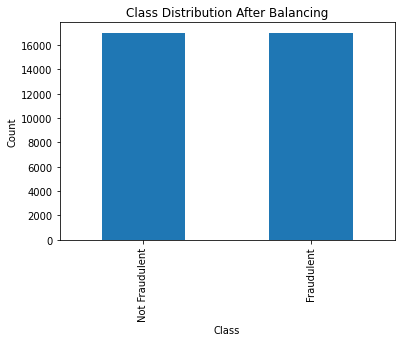

In [ ]:
# Count the number of samples in each class
class_counts = df["fraudulent"].value_counts()

# Create a bar plot of the class counts
class_counts.plot(kind="bar")
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Fraudulent", "Fraudulent"])
plt.show()

In [ ]:
# Naive Bayes from scratch
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
len(df. index)

34028

In [ ]:
len(train_data. index)

27222

In [ ]:
len(test_data. index)

6806

In [ ]:
# Calculate the prior probabilities for each class
prior = {}
total = len(train_data)
for i in range(total):
    label = train_data.iloc[i]['fraudulent']
    if label in prior:
        prior[label] += 1
    else:
        prior[label] = 1
for label in prior:
    prior[label] /= total

In [ ]:
prior

{0: 0.6250091837484387, 1: 0.3749908162515612}

In [ ]:
# Calculate the conditional probabilities for each feature
cond_prob = {}
for col in train_data.columns[:-1]:
#     print(col)
    for label in prior:
        cond_prob[(col, label)] = {}
        for value in set(train_data[col]):
            count = len(train_data[(train_data[col] == value) & (train_data['fraudulent'] == label)])
            cond_prob[(col, label)][value] = (count + 1) / (prior[label] * total + len(set(train_data[col])))

In [ ]:
cond_prob

{('telecommuting', 0): {0: 0.9586271744240714, 1: 0.041372825575928536},
 ('telecommuting', 1): {0: 0.9243878550440744, 1: 0.07561214495592557},
 ('has_company_logo', 0): {0: 0.1808885754583921, 1: 0.8191114245416079},
 ('has_company_logo', 1): {0: 0.667384916748286, 1: 0.332615083251714},
 ('has_questions', 0): {0: 0.4979431123648331, 1: 0.5020568876351669},
 ('has_questions', 1): {0: 0.7134182174338883, 1: 0.28658178256611166},
 ('employment_type', 0): {0: 0.18983548766157463,
  1: 0.08701527614571093,
  2: 0.6539952996474736,
  3: 0.012514688601645124,
  4: 0.04253819036427732,
  5: 0.01410105757931845},
 ('employment_type', 1): {0: 0.28069316624241236,
  1: 0.052966516545917365,
  2: 0.5656941452907773,
  3: 0.01576267867632661,
  4: 0.08292539651458782,
  5: 0.001958096729978461},
 ('required_experience', 0): {0: 0.3886734813770415,
  1: 0.1325343672893902,
  2: 0.02191281870520503,
  3: 0.14798496063917282,
  4: 0.007754670426506873,
  5: 0.021854071201973916,
  6: 0.217189519445

In [ ]:
# Predict the labels for the testing set
predicted = []
for i in range(len(test_data)):
    row = test_data.iloc[i]
    probs = {}
    for label in prior:
        prob = prior[label]
        for col in test_data.columns[:-1]:
            value = row[col]
            if value in cond_prob[(col, label)]:
                prob *= cond_prob[(col, label)][value]
            else:
                prob *= 1 / (prior[label] * total + len(set(train_data[col])))
        probs[label] = prob
    predicted.append(max(probs, key=probs.get))

# Evaluate the performance of the model
actual = test_data['fraudulent'].tolist()
tp = fp = tn = fn = 0
for i in range(len(actual)):
    if actual[i] == predicted[i]:
        if actual[i] == 1:
            tp += 1
        else:
            tn += 1
    else:
        if actual[i] == 1:
            fn += 1
        else:
            fp += 1
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Accuracy: 0.7475756685277696
Precision: 1.0
Recall: 0.7475756685277696
F1 Score: 0.8555574239112158


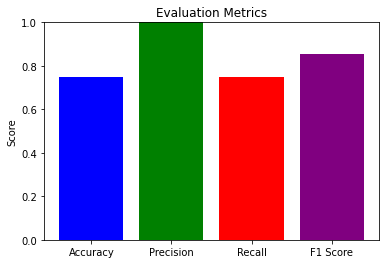

In [ ]:
# Plot the metrics
fig, ax = plt.subplots()
ax.bar(["Accuracy", "Precision", "Recall", "F1 Score"], [accuracy, precision, recall, f1_score], color=["blue", "green", "red", "purple"])
ax.set_ylim([0, 1])
ax.set_title("Evaluation Metrics")
ax.set_ylabel("Score")
plt.show()

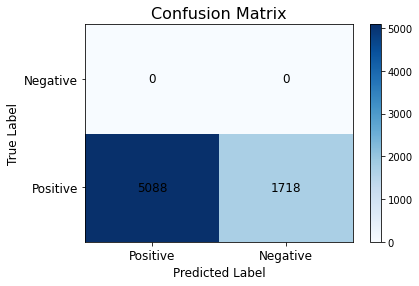

In [ ]:
# Define the labels for the confusion matrix
labels = ['Positive', 'Negative']

# Create the confusion matrix
conf_matrix = np.array([[tp, fn], [fp, tn]])

# Create the heatmap for the confusion matrix
heatmap = plt.pcolor(conf_matrix, cmap=plt.cm.Blues)

# Set the ticks for the heatmap
plt.xticks([0.5, 1.5], labels, fontsize=12)
plt.yticks([0.5, 1.5], labels, fontsize=12)

# Add the values to the heatmap
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j+0.5, i+0.5, str(conf_matrix[i][j]), fontsize=12,
                 horizontalalignment='center', verticalalignment='center')

# Add a color bar to the heatmap
plt.colorbar(heatmap)

# Set the title and axis labels
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
col_list=list(df.columns)
for i in col_list:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [ ]:
y=df['fraudulent']
x=df.drop(['fraudulent'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=random_forest.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

Accuracy: 0.9391713194240376
Precision: 0.9391904814876155
Recall: 0.9391713194240376
F1-score: 0.9391727902860527
